<a href="https://colab.research.google.com/github/Samarjeet09/Principal_Component_Analysis-Implementation/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
data_URL= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [ ]:
iris = pd.read_csv(data_URL,header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.columns = ['sep_len','sep_wid','pet_len','pet_wid','name']
iris.dropna(how= 'all',inplace = True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep_len  150 non-null    float64
 1   sep_wid  150 non-null    float64
 2   pet_len  150 non-null    float64
 3   pet_wid  150 non-null    float64
 4   name     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Task 3: Visualize the Data
---

<Axes: xlabel='sep_len', ylabel='sep_wid'>

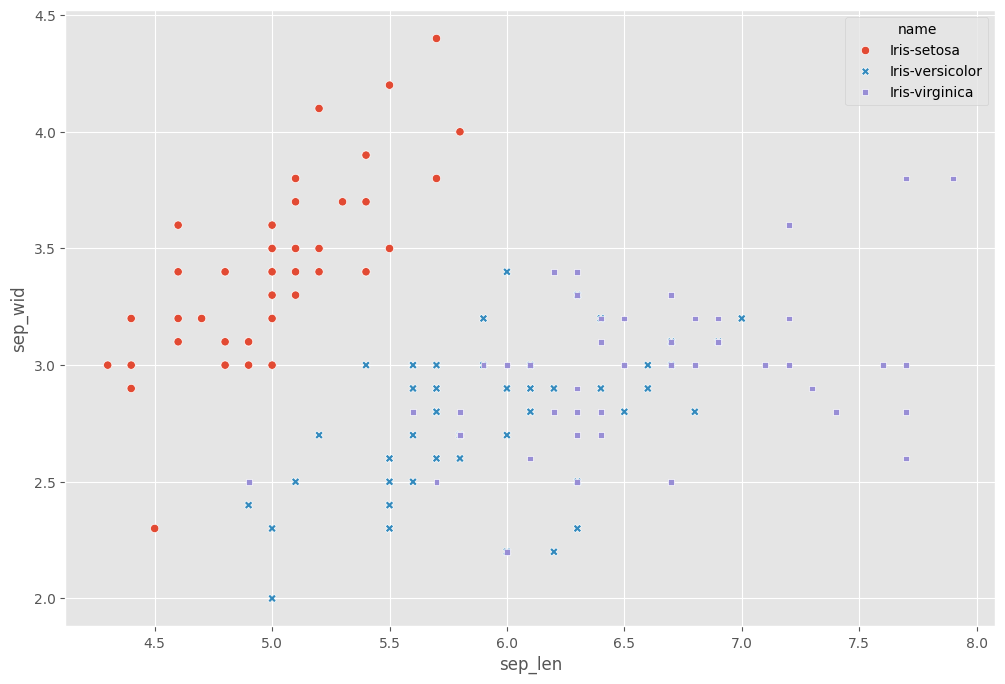

In [ ]:
sns.scatterplot(x= iris.sep_len,y = iris.sep_wid , hue = iris.name , style = iris.name)

<Axes: xlabel='pet_len', ylabel='pet_wid'>

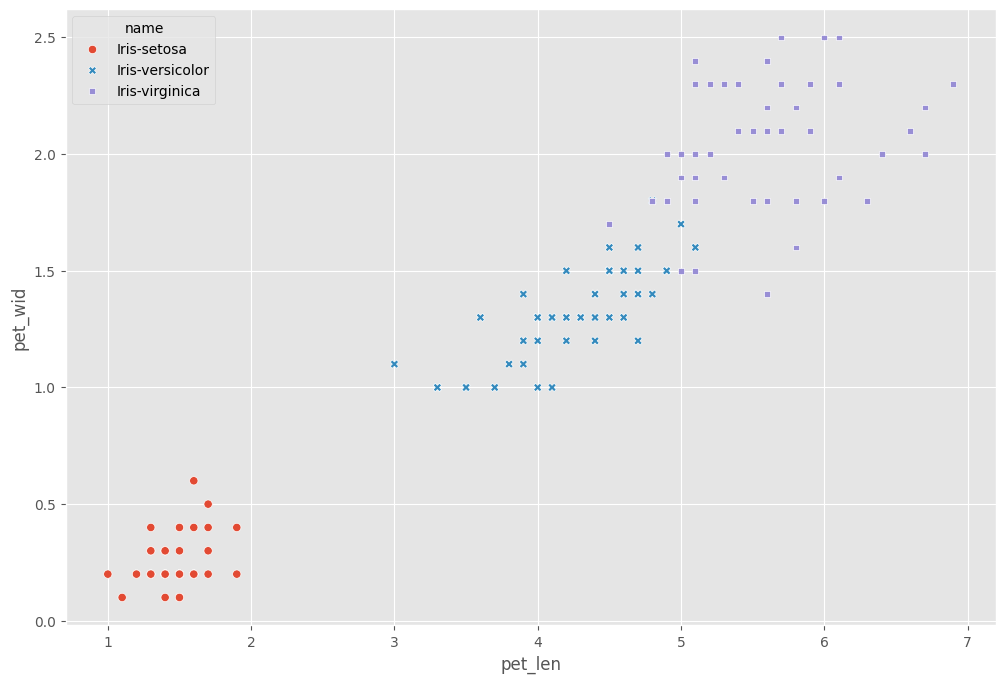

In [ ]:
sns.scatterplot(x= iris.pet_len,y = iris.pet_wid , hue = iris.name , style = iris.name)

### Task 4: Standardize the Data
---

In [ ]:
X = iris.iloc[:,:-1].values
y = iris.name.values

In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [ ]:
cov_mat = np.cov(X.T)
print(cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [ ]:
eig_vals , eig_vec = np.linalg.eig(cov_mat)
print('eigen Values: \n' ,eig_vals)
print('\neigen Vectors: \n', eig_vec)

eigen Values: 
 [2.93035378 0.92740362 0.14834223 0.02074601]

eigen Vectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Task 6: Singular Value Decomposition (SVD)
---

In [ ]:
eig_vec_svd, s , v = np.linalg.svd(X.T)

In [ ]:
print('eig_vec_svd\n',eig_vec_svd)

eig_vec_svd
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


### Task 7: Picking Principal Components Using the Explained Variance
---

In [ ]:
for val in eig_vals:print(val)

2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [ ]:
sum_eig_vals = sum(eig_vals)
var_exp = [ i *100 / sum_eig_vals for i in eig_vals]
print(var_exp)

[72.77045209380135, 23.03052326768065, 3.6838319576273784, 0.5151926808906321]


In [ ]:
cumulative_var_exp = np.cumsum(var_exp)
print(cumulative_var_exp)

[ 72.77045209  95.80097536  99.48480732 100.        ]


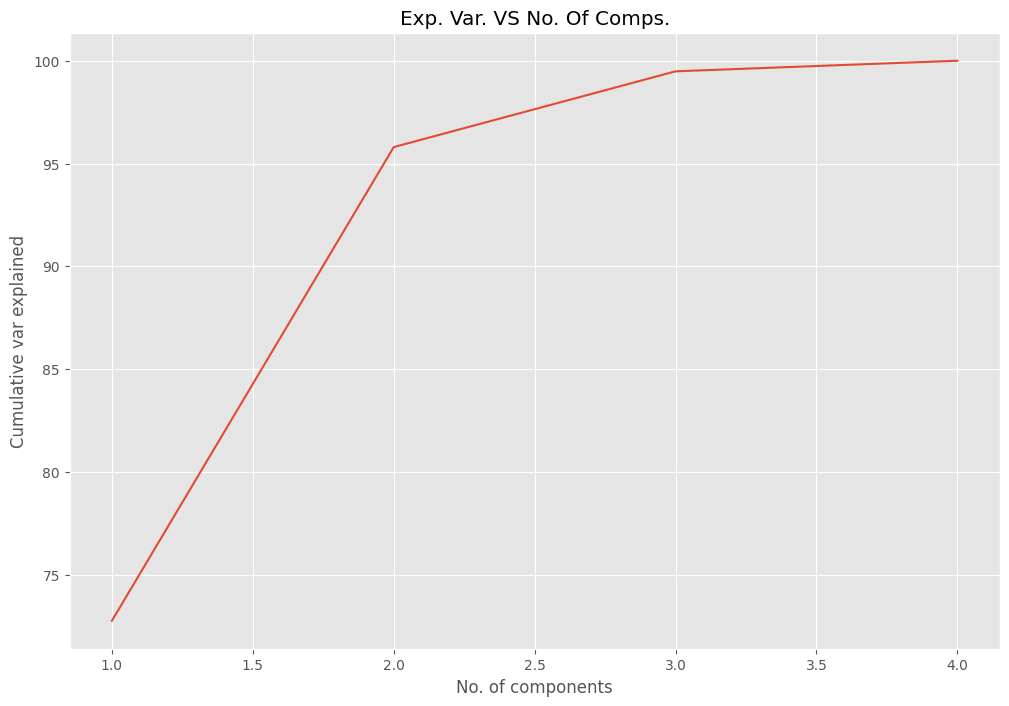

In [ ]:
sns.lineplot(x = [1,2,3,4], y = cumulative_var_exp)
plt.xlabel("No. of components")
plt.ylabel("Cumulative var explained")
plt.title("Exp. Var. VS No. Of Comps.")
plt.show()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [ ]:
eig_vec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [ ]:
proj_mat = (eig_vec.T[:][:])[:2].T
print(proj_mat)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
X_pca = X.dot(proj_mat)

In [ ]:
# for species in list(set(y)):
#   sns.scatterplot(X_pca[y== species,0],X_pca[y == species,1])

a = list(X_pca.T)
a.append(list(y.T))
a
tot = np.asarray(a)
tot = tot.T